In [2]:
import os
os.getcwd()

'C:\\Users\\jared\\Kings Project'

In [3]:
import json

with open('international_box_player_season.json', 'r') as file:
    intl_data = json.load(file)

with open('nba_box_player_season.json', 'r') as file:
    nba_data = json.load(file)

with open('player.json', 'r') as file:
    player_data = json.load(file)

In [4]:
import pandas as pd

intl_df = pd.DataFrame(intl_data)
nba_df = pd.DataFrame(nba_data)
player_df = pd.DataFrame(player_data)

nba_var = nba_df.columns
intl_var = intl_df.columns

common_var = list(set(nba_var) & set(intl_var))
#nba set has 3 variables that the intl set does not have, consider this when proceeding (55 vs 52)

not_common_var = list(set(nba_var) ^ set(intl_var))
not_common_var # see here variables in nba set & not in intl set

print(intl_df.isnull().any())
print('\n')
print(nba_df.isnull().any())

first_name                         False
last_name                          False
season                             False
season_type                        False
league                             False
team                                True
games                              False
starts                             False
minutes                            False
points                             False
two_points_made                    False
two_points_attempted               False
three_points_made                  False
three_points_attempted             False
free_throws_made                   False
free_throws_attempted              False
blocked_shot_attempts              False
offensive_rebounds                 False
defensive_rebounds                 False
assists                            False
screen_assists                     False
turnovers                          False
steals                             False
deflections                        False
loose_balls_reco

In [5]:
sorted_var = sorted(common_var, key=lambda x: list(intl_var).index(x))
sorted_var

nba_df_adj = nba_df[sorted_var]

names = nba_df_adj["last_name"].unique()
nba_names_df_dict = {}
for n in names:
    df = nba_df_adj[nba_df_adj["last_name"] == n]
    nba_names_df_dict[n] = df

names2 = intl_df["last_name"].unique()
intl_names_df_dict = {}
for n in names2:
    df = intl_df[intl_df["last_name"] == n]
    intl_names_df_dict[n] = df

nba_df_adj = nba_df_adj.set_index("last_name")
intl_df = intl_df.set_index("last_name")
# making the index the last name of the player to make it easier to see which players fall into which clusters

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [7]:
numeric_var = nba_df_adj.dtypes[nba_df_adj.dtypes != object].index

In [8]:
nba_numeric = nba_df_adj[numeric_var]
nba_numeric = nba_numeric.drop("season", axis = 1)
nba_numeric

intl_numeric = intl_df[numeric_var]
intl_numeric = intl_numeric.drop("season", axis = 1)
intl_numeric

,games,starts,minutes,points,two_points_made,two_points_attempted,three_points_made,three_points_attempted,free_throws_made,free_throws_attempted,...,three_point_attempt_rate,free_throw_rate,offensive_rebounding_percentage,defensive_rebounding_percentage,total_rebounding_percentage,assist_percentage,steal_percentage,block_percentage,turnover_percentage,internal_box_plus_minus
last_name,,,,,,,,,,,,,,,,,,,,,
greene,25,18,527.61,195,40,78,30,74,25,31,...,0.4868,0.2039,3.2474,13.4519,9.7267,19.0212,1.8221,0.0000,13.5671,0.7786
greene,17,10,356.70,135,26,56,20,43,23,29,...,0.4343,0.2929,3.7781,13.5418,9.9234,14.7139,0.8723,0.8292,11.1323,2.7367
brussino,12,2,204.70,82,14,25,11,27,21,22,...,0.5192,0.4231,3.0377,14.5608,10.4102,5.2539,1.5268,3.0675,13.9509,3.2200
brussino,16,3,266.00,83,24,47,5,25,20,24,...,0.3472,0.3333,3.7641,14.6187,8.9342,4.4051,1.9879,1.4668,7.8160,-1.5619
christmas,6,1,70.48,15,3,8,2,15,3,4,...,0.6522,0.1739,4.2915,6.9312,6.6163,5.7849,1.8662,2.4437,13.9082,-5.7589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nowitzki,23,20,438.10,190,85,151,0,0,20,28,...,0.0000,0.1854,13.3135,22.3172,16.8587,8.0092,1.4940,4.6382,18.0614,-1.3317
oakley,10,3,134.96,29,3,12,7,16,2,2,...,0.5714,0.0714,4.0203,12.7263,8.2733,6.7163,2.3231,0.0000,14.7580,-2.1425
toolson,24,1,380.02,131,32,52,17,40,16,24,...,0.4348,0.2609,5.7577,15.3084,9.7191,11.6266,0.8287,0.6259,17.6622,-0.5522


In [9]:
nba_numeric_noNA = nba_numeric.fillna(0)
intl_numeric_noNA = intl_numeric.fillna(0)
# filling all missing values w/0, as they seem to be a product of very few games being played by that individual

In [10]:
scaler = StandardScaler()
nba_scaled = scaler.fit_transform(nba_numeric_noNA)

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, init = "k-means++", max_iter = 500, random_state = 352)

kmeans.fit(nba_scaled)
nba_labels = kmeans.predict(nba_scaled)

In [12]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(nba_scaled, nba_labels)
silhouette_avg #no PCA equals cluttered clusters, unsurprising given dimensionality of the data

0.1662484172128903

In [13]:
pca = PCA(n_components = 3)
nba_pca = pca.fit_transform(nba_scaled)
pca.explained_variance_ratio_

array([0.35998438, 0.1078732 , 0.06888199])

In [14]:
sum(pca.explained_variance_ratio_)

0.5367395631597758

In [15]:
kmeans_pca = KMeans(n_clusters = 4, init = "k-means++", max_iter = 500, random_state = 352)

kmeans_pca.fit(nba_pca)
nba_pca_labels = kmeans_pca.predict(nba_pca)

In [16]:
silhouette_pca_avg = silhouette_score(nba_pca, nba_pca_labels)
silhouette_pca_avg

0.4120427892677913

Steps for tomorrow: 
- repeat above stuff with intl data set for caution's sake
- test clustering on PCA-adjusted versions of the data (will also be able to plot this)
- can we separate certain statistics to get an impression of positions? will that occur naturally with the clustering?
    - PCA dimension reduction could cause issues with this, maybe separate into groups based on rebounding rate/some other more neutral statistic that could distinguish positions without worrying about skill or value?

In [18]:
intl_scaled = scaler.fit_transform(intl_numeric_noNA)

In [19]:
kmeans2 = KMeans(n_clusters = 4, init = "k-means++", max_iter = 500, random_state = 352)

kmeans2.fit(intl_scaled)
intl_labels = kmeans2.predict(intl_scaled)

In [20]:
silhouette_avg2 = silhouette_score(intl_scaled, intl_labels)
silhouette_avg2

0.16909022757378492

In [21]:
pca2 = PCA(n_components = 3)
intl_pca = pca2.fit_transform(intl_scaled)
pca2.explained_variance_ratio_

array([0.46778386, 0.14989814, 0.05240156])

In [22]:
sum(pca2.explained_variance_ratio_)

0.670083554672231

In [23]:
kmeans_pca2 = KMeans(n_clusters = 4, init = "k-means++", max_iter = 500, random_state = 352)

kmeans_pca2.fit(intl_pca)
intl_pca_labels = kmeans_pca2.predict(intl_pca)

In [24]:
silhouette_pca_avg2 = silhouette_score(intl_pca, intl_pca_labels)
silhouette_pca_avg2

0.33505610279275766

PCA = bad option, removes explainability of the data I'm working with, next steps:
- Separate our data into potential position containers (determine with rebound rate statistics or something like that)
- Narrow down to smaller subset of the data to make our analysis more approachable
  - Select prediction variables based on what position we're looking at, what is most valued at what position.
  - Hopefully have an easier time graphing our results and approaching from that angle as well

Once going through that, work on a presentation that walks through process and eventual results 
- (hopefully next go around gives me more actionable stuff to work with).

Pick 5 variables/traits per position group to get the best at certain roles:
(note: potentially combine 3pt makes/attempts into 3pt %, either that or just use true shooting for efficiency)
(note 2: if working with true shooting, take 3pt/2pt attempts rather than makes, show volume + efficiency, although counting makes could maybe do the same thing)
- Guard
    - Assists
    - Assist %
    - Turnover %
    - True Shooting
    - 3pt Made
    - Steals
- Wing
    - Steals (%?)
    - Deflections
    - 3pt Made
    - True Shooting
    - Personal Fouls Drawn? FT made?
- Big
    - Blocks (%?)
    - Rebounding (%?)
    - True Shooting
    - Screen Assists (especially for King DHO heavy offense)
    - 2pt Made
    - Second Chance Pts? Pts in Paint? (what of these isn't redundant)

In [26]:
nba_numeric.columns

Index(['games', 'starts', 'minutes', 'points', 'two_points_made',
       'two_points_attempted', 'three_points_made', 'three_points_attempted',
       'free_throws_made', 'free_throws_attempted', 'blocked_shot_attempts',
       'offensive_rebounds', 'defensive_rebounds', 'assists', 'screen_assists',
       'turnovers', 'steals', 'deflections', 'loose_balls_recovered',
       'blocked_shots', 'personal_fouls', 'personal_fouls_drawn',
       'offensive_fouls', 'charges_drawn', 'technical_fouls', 'flagrant_fouls',
       'ejections', 'points_off_turnovers', 'points_in_paint',
       'second_chance_points', 'fast_break_points', 'possessions',
       'estimated_possessions', 'team_possessions', 'usage_percentage',
       'true_shooting_percentage', 'three_point_attempt_rate',
       'free_throw_rate', 'offensive_rebounding_percentage',
       'defensive_rebounding_percentage', 'total_rebounding_percentage',
       'assist_percentage', 'steal_percentage', 'block_percentage',
       'turnover

In [27]:
nba_guard = nba_numeric_noNA[["assist_percentage", "turnover_percentage", "true_shooting_percentage", "three_points_made", "steal_percentage"]]
nba_wing = nba_numeric_noNA[["deflections", "personal_fouls_drawn", "true_shooting_percentage", "three_points_made", "steal_percentage"]]
nba_big = nba_numeric_noNA[["block_percentage", "defensive_rebounding_percentage", "two_points_made", "screen_assists", "second_chance_points"]]

intl_guard = intl_numeric_noNA[["assist_percentage", "turnover_percentage", "true_shooting_percentage", "three_points_made", "steal_percentage"]]
intl_wing = intl_numeric_noNA[["deflections", "personal_fouls_drawn", "true_shooting_percentage", "three_points_made", "steal_percentage"]]
intl_big = intl_numeric_noNA[["block_percentage", "defensive_rebounding_percentage", "two_points_made", "screen_assists", "second_chance_points"]]

In [28]:
nba_guard

intl_guard

,assist_percentage,turnover_percentage,true_shooting_percentage,three_points_made,steal_percentage
last_name,,,,,
greene,19.0212,13.5671,0.5886,30,1.8221
greene,14.7139,11.1323,0.6040,20,0.8723
brussino,5.2539,13.9509,0.6647,11,1.5268
brussino,4.4051,7.8160,0.5027,5,1.9879
christmas,5.7849,13.9082,0.3029,2,1.8662
...,...,...,...,...,...
nowitzki,8.0092,18.0614,0.5817,0,1.4940
oakley,6.7163,14.7580,0.5021,7,2.3231
toolson,11.6266,17.6622,0.6387,17,0.8287


## Guard Section

In [30]:
nba_guard_s = scaler.fit_transform(nba_guard)
intl_guard_s = scaler.fit_transform(intl_guard)

In [31]:
kmeans_guard = KMeans(n_clusters = 4, init = "k-means++", max_iter = 500, random_state = 352)

kmeans_guard.fit(nba_guard_s)
nba_guard_labels = kmeans_guard.predict(nba_guard_s)

In [32]:
silhouette_guard = silhouette_score(nba_guard_s, nba_guard_labels)
silhouette_guard

0.2669483649733966

In [33]:
nba_guard["guard_cluster"] = nba_guard_labels
nba_guard

C:\Users\jared\AppData\Local\Temp\ipykernel_27000\1817403375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_guard["guard_cluster"] = nba_guard_labels


,assist_percentage,turnover_percentage,true_shooting_percentage,three_points_made,steal_percentage,guard_cluster
last_name,,,,,,
Christmas,7.9835,7.8512,0.5551,99,1.7237,0
Christmas,5.7126,7.2601,0.5676,90,1.7110,0
Christmas,3.7177,7.9221,0.5070,41,1.5495,1
Humphrey,6.3495,15.6365,0.6324,1,2.0357,1
Humphrey,4.4947,15.6001,0.5195,4,1.5469,1
...,...,...,...,...,...,...
Nwaelele,4.4250,14.5908,0.5161,39,0.9217,1
Nwaelele,10.7280,14.9306,0.4449,37,1.0850,1
Nowitzki,5.2298,12.3340,0.7143,0,0.5004,1


In [34]:
np.unique(nba_guard_labels, return_counts = True)

(array([0, 1, 2, 3]), array([262, 940, 144, 339], dtype=int64))

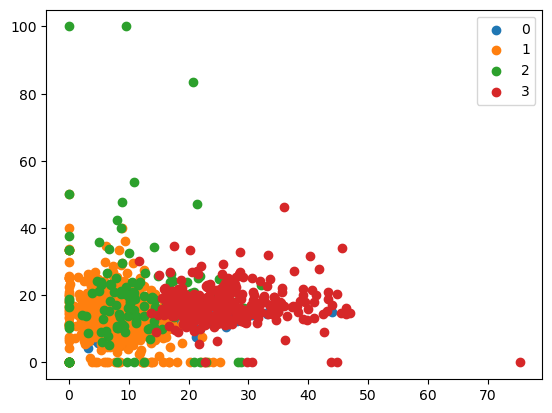

In [35]:
plt.scatter(nba_guard.loc[nba_guard["guard_cluster"] == 0, "assist_percentage"], nba_guard.loc[nba_guard["guard_cluster"] == 0, "turnover_percentage"], label = 0)
plt.scatter(nba_guard.loc[nba_guard["guard_cluster"] == 1, "assist_percentage"], nba_guard.loc[nba_guard["guard_cluster"] == 1, "turnover_percentage"], label = 1)
plt.scatter(nba_guard.loc[nba_guard["guard_cluster"] == 2, "assist_percentage"], nba_guard.loc[nba_guard["guard_cluster"] == 2, "turnover_percentage"], label = 2)
plt.scatter(nba_guard.loc[nba_guard["guard_cluster"] == 3, "assist_percentage"], nba_guard.loc[nba_guard["guard_cluster"] == 3, "turnover_percentage"], label = 3)
plt.legend()
plt.show()

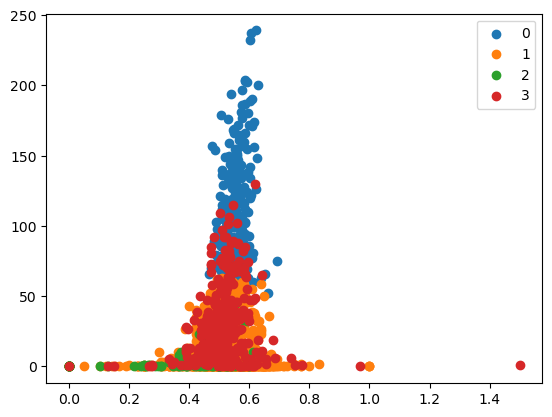

In [36]:
plt.scatter(nba_guard.loc[nba_guard["guard_cluster"] == 0, "true_shooting_percentage"], nba_guard.loc[nba_guard["guard_cluster"] == 0, "three_points_made"], label = 0)
plt.scatter(nba_guard.loc[nba_guard["guard_cluster"] == 1, "true_shooting_percentage"], nba_guard.loc[nba_guard["guard_cluster"] == 1, "three_points_made"], label = 1)
plt.scatter(nba_guard.loc[nba_guard["guard_cluster"] == 2, "true_shooting_percentage"], nba_guard.loc[nba_guard["guard_cluster"] == 2, "three_points_made"], label = 2)
plt.scatter(nba_guard.loc[nba_guard["guard_cluster"] == 3, "true_shooting_percentage"], nba_guard.loc[nba_guard["guard_cluster"] == 3, "three_points_made"], label = 3)
plt.legend()
plt.show()

In [37]:
kmeans_guard2 = KMeans(n_clusters = 4, init = "k-means++", max_iter = 500, random_state = 352)

kmeans_guard2.fit(intl_guard_s)
intl_guard_labels = kmeans_guard.predict(intl_guard_s)

In [38]:
silhouette_guard2 = silhouette_score(intl_guard_s, intl_guard_labels)
silhouette_guard2

0.2610709053645047

In [39]:
intl_guard["guard_cluster"] = intl_guard_labels
intl_guard

C:\Users\jared\AppData\Local\Temp\ipykernel_27000\1574012096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intl_guard["guard_cluster"] = intl_guard_labels


,assist_percentage,turnover_percentage,true_shooting_percentage,three_points_made,steal_percentage,guard_cluster
last_name,,,,,,
greene,19.0212,13.5671,0.5886,30,1.8221,0
greene,14.7139,11.1323,0.6040,20,0.8723,1
brussino,5.2539,13.9509,0.6647,11,1.5268,1
brussino,4.4051,7.8160,0.5027,5,1.9879,1
christmas,5.7849,13.9082,0.3029,2,1.8662,1
...,...,...,...,...,...,...
nowitzki,8.0092,18.0614,0.5817,0,1.4940,1
oakley,6.7163,14.7580,0.5021,7,2.3231,1
toolson,11.6266,17.6622,0.6387,17,0.8287,1


In [40]:
np.unique(intl_guard_labels, return_counts = True)

(array([0, 1, 2, 3]), array([ 571, 1934,  168,  697], dtype=int64))

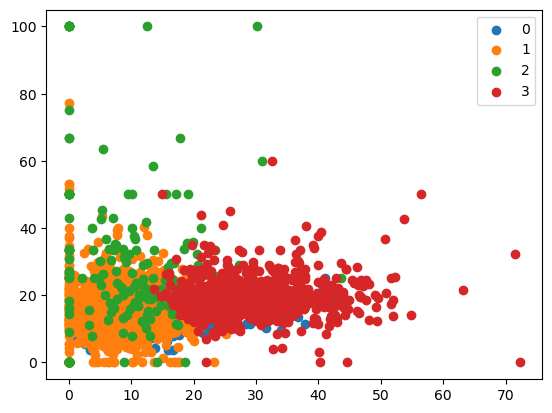

In [41]:
plt.scatter(intl_guard.loc[intl_guard["guard_cluster"] == 0, "assist_percentage"], intl_guard.loc[intl_guard["guard_cluster"] == 0, "turnover_percentage"], label = 0)
plt.scatter(intl_guard.loc[intl_guard["guard_cluster"] == 1, "assist_percentage"], intl_guard.loc[intl_guard["guard_cluster"] == 1, "turnover_percentage"], label = 1)
plt.scatter(intl_guard.loc[intl_guard["guard_cluster"] == 2, "assist_percentage"], intl_guard.loc[intl_guard["guard_cluster"] == 2, "turnover_percentage"], label = 2)
plt.scatter(intl_guard.loc[intl_guard["guard_cluster"] == 3, "assist_percentage"], intl_guard.loc[intl_guard["guard_cluster"] == 3, "turnover_percentage"], label = 3)
plt.legend()
plt.show()

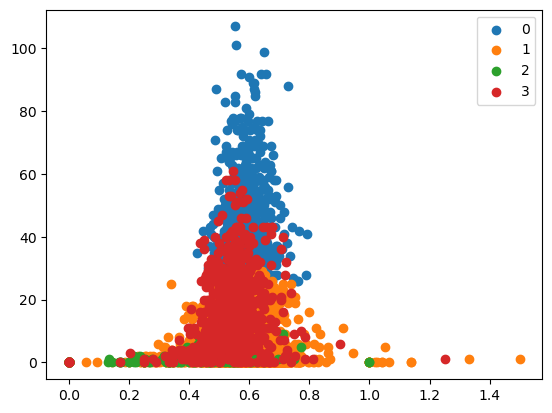

In [42]:
plt.scatter(intl_guard.loc[intl_guard["guard_cluster"] == 0, "true_shooting_percentage"], intl_guard.loc[intl_guard["guard_cluster"] == 0, "three_points_made"], label = 0)
plt.scatter(intl_guard.loc[intl_guard["guard_cluster"] == 1, "true_shooting_percentage"], intl_guard.loc[intl_guard["guard_cluster"] == 1, "three_points_made"], label = 1)
plt.scatter(intl_guard.loc[intl_guard["guard_cluster"] == 2, "true_shooting_percentage"], intl_guard.loc[intl_guard["guard_cluster"] == 2, "three_points_made"], label = 2)
plt.scatter(intl_guard.loc[intl_guard["guard_cluster"] == 3, "true_shooting_percentage"], intl_guard.loc[intl_guard["guard_cluster"] == 3, "three_points_made"], label = 3)
plt.legend()
plt.show()

In [43]:
nba_guard.sort_values(by = "assist_percentage", ascending = False).head(20)

,assist_percentage,turnover_percentage,true_shooting_percentage,three_points_made,steal_percentage,guard_cluster
last_name,,,,,,
Luz,75.3864,0.0000,0.5123,0,0.0000,3
Wallace Jr.,46.9331,14.6544,0.4948,38,1.3336,3
Haslem,46.3805,14.5642,0.5870,85,1.1853,3
Wallace Jr.,46.3764,16.2892,0.5450,115,1.0345,3
Forte III,45.6474,34.0136,0.1289,0,0.0000,3
Wallace Jr.,45.5074,14.7045,0.5213,53,1.2304,3
Dimec,44.8377,0.0000,1.5000,1,0.0000,3
Yildizli,44.8068,20.3666,0.4516,13,2.8127,3
Radoncic Jr.,43.9663,17.0235,0.5474,59,1.2773,3


In [44]:
intl_guard.sort_values(by = "assist_percentage", ascending = False).head(20)

,assist_percentage,turnover_percentage,true_shooting_percentage,three_points_made,steal_percentage,guard_cluster
last_name,,,,,,
ariza,72.2908,0.0000,0.0000,0,0.0000,3
butterfield,71.5298,32.1888,0.4747,1,5.3781,3
montross,63.2054,21.6138,0.3447,2,0.0000,3
clemons,56.4334,50.0000,0.0000,0,0.0000,3
dibartolomeo,54.7689,14.2404,0.5349,34,3.4979,3
finley,53.6885,42.5791,0.4237,0,1.8447,3
dibartolomeo,52.2359,25.4002,0.5339,21,1.7698,3
delow,52.0302,13.8504,0.7838,8,3.8146,3
harrow,51.9045,18.4738,0.5665,38,2.1822,3


In [45]:
nba_guard.sort_values(by = "three_points_made", ascending = False).head(20)

,assist_percentage,turnover_percentage,true_shooting_percentage,three_points_made,steal_percentage,guard_cluster
last_name,,,,,,
Parrillo,21.8190,17.3221,0.6229,239,1.6202,0
Hammons,8.3378,11.0325,0.6059,237,1.7990,0
Hammons,8.5835,11.2622,0.6014,232,2.3239,0
Jaramaz,7.6131,11.5796,0.5848,204,1.6136,0
Hammons,12.3062,10.2562,0.5854,203,2.4806,0
Radoncic Jr.,24.0304,11.5648,0.5926,202,1.3546,0
Sloan,10.3076,8.1641,0.6283,200,1.2493,0
Parrillo,25.3580,18.3709,0.5744,197,2.2083,0
Kaimakoglou,11.7902,9.6424,0.5392,194,1.9504,0


In [46]:
intl_guard.sort_values(by = "three_points_made", ascending = False).head(20)

,assist_percentage,turnover_percentage,true_shooting_percentage,three_points_made,steal_percentage,guard_cluster
last_name,,,,,,
forbes,36.7222,13.6570,0.5521,107,2.8240,0
thompson,25.1070,16.5411,0.5552,101,1.1619,0
smith-rivera,12.4389,10.8586,0.6501,99,1.5787,0
melo,15.7920,9.2251,0.5719,92,0.7264,0
ha,5.3221,8.8866,0.6392,92,1.0400,0
moraschini,30.4277,16.9261,0.6549,92,1.4490,0
alexander-walker,10.0477,7.8875,0.5976,91,1.3487,0
balbi,23.7044,14.6761,0.6168,89,2.9717,0
cerella,17.5411,12.8220,0.6134,89,1.1154,0


## Wing Section

In [48]:
nba_wing_s = scaler.fit_transform(nba_wing)
intl_wing_s = scaler.fit_transform(intl_wing)

In [49]:
kmeans_wing = KMeans(n_clusters = 4, init = "k-means++", max_iter = 500, random_state = 352)

kmeans_wing.fit(nba_wing_s)
nba_wing_labels = kmeans_wing.predict(nba_wing_s)

In [50]:
silhouette_wing = silhouette_score(nba_wing_s, nba_wing_labels)
silhouette_wing

0.2778411106251312

In [51]:
nba_wing["wing_cluster"] = nba_wing_labels
nba_wing

C:\Users\jared\AppData\Local\Temp\ipykernel_27000\3497048587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_wing["wing_cluster"] = nba_wing_labels


,deflections,personal_fouls_drawn,true_shooting_percentage,three_points_made,steal_percentage,wing_cluster
last_name,,,,,,
Christmas,62,0,0.5551,99,1.7237,3
Christmas,78,0,0.5676,90,1.7110,3
Christmas,29,0,0.5070,41,1.5495,1
Humphrey,0,0,0.6324,1,2.0357,1
Humphrey,0,0,0.5195,4,1.5469,1
...,...,...,...,...,...,...
Nwaelele,29,0,0.5161,39,0.9217,1
Nwaelele,38,0,0.4449,37,1.0850,1
Nowitzki,6,0,0.7143,0,0.5004,1


In [52]:
np.unique(nba_wing_labels, return_counts = True)

(array([0, 1, 2, 3]), array([ 282, 1248,    1,  154], dtype=int64))

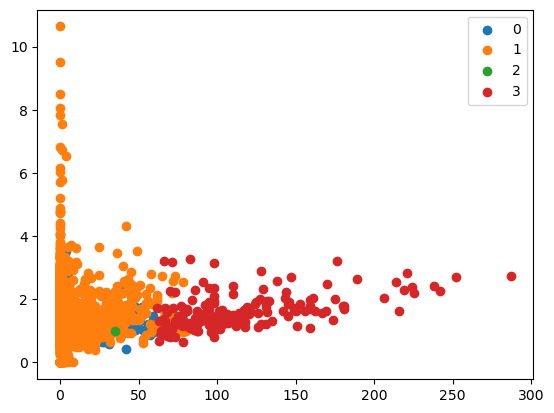

In [53]:
plt.scatter(nba_wing.loc[nba_wing["wing_cluster"] == 0, "deflections"], nba_wing.loc[nba_wing["wing_cluster"] == 0, "steal_percentage"], label = 0)
plt.scatter(nba_wing.loc[nba_wing["wing_cluster"] == 1, "deflections"], nba_wing.loc[nba_wing["wing_cluster"] == 1, "steal_percentage"], label = 1)
plt.scatter(nba_wing.loc[nba_wing["wing_cluster"] == 2, "deflections"], nba_wing.loc[nba_wing["wing_cluster"] == 2, "steal_percentage"], label = 2)
plt.scatter(nba_wing.loc[nba_wing["wing_cluster"] == 3, "deflections"], nba_wing.loc[nba_wing["wing_cluster"] == 3, "steal_percentage"], label = 3)
plt.legend()
plt.show()

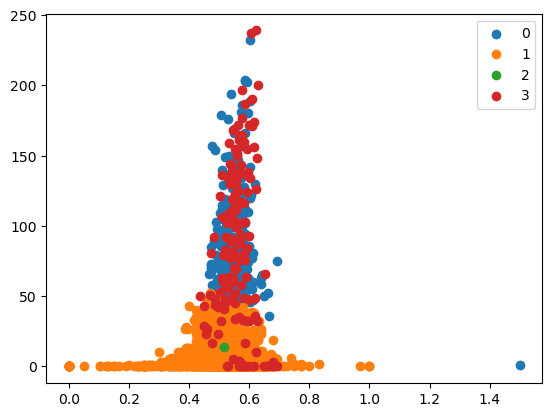

In [54]:
plt.scatter(nba_wing.loc[nba_wing["wing_cluster"] == 0, "true_shooting_percentage"], nba_wing.loc[nba_wing["wing_cluster"] == 0, "three_points_made"], label = 0)
plt.scatter(nba_wing.loc[nba_wing["wing_cluster"] == 1, "true_shooting_percentage"], nba_wing.loc[nba_wing["wing_cluster"] == 1, "three_points_made"], label = 1)
plt.scatter(nba_wing.loc[nba_wing["wing_cluster"] == 2, "true_shooting_percentage"], nba_wing.loc[nba_wing["wing_cluster"] == 2, "three_points_made"], label = 2)
plt.scatter(nba_wing.loc[nba_wing["wing_cluster"] == 3, "true_shooting_percentage"], nba_wing.loc[nba_wing["wing_cluster"] == 3, "three_points_made"], label = 3)
plt.legend()
plt.show()

In [55]:
kmeans_wing2 = KMeans(n_clusters = 4, init = "k-means++", max_iter = 500, random_state = 352)

kmeans_wing2.fit(intl_wing_s)
intl_wing_labels = kmeans_wing2.predict(intl_wing_s)

In [56]:
silhouette_wing2 = silhouette_score(intl_wing_s, intl_wing_labels)
silhouette_wing2

0.2638957977443685

In [57]:
intl_wing["wing_cluster"] = intl_wing_labels
intl_wing

C:\Users\jared\AppData\Local\Temp\ipykernel_27000\376295910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intl_wing["wing_cluster"] = intl_wing_labels


,deflections,personal_fouls_drawn,true_shooting_percentage,three_points_made,steal_percentage,wing_cluster
last_name,,,,,,
greene,0,39,0.5886,30,1.8221,2
greene,0,26,0.6040,20,0.8723,0
brussino,0,20,0.6647,11,1.5268,0
brussino,0,20,0.5027,5,1.9879,0
christmas,0,6,0.3029,2,1.8662,3
...,...,...,...,...,...,...
nowitzki,0,40,0.5817,0,1.4940,0
oakley,0,7,0.5021,7,2.3231,0
toolson,0,26,0.6387,17,0.8287,0


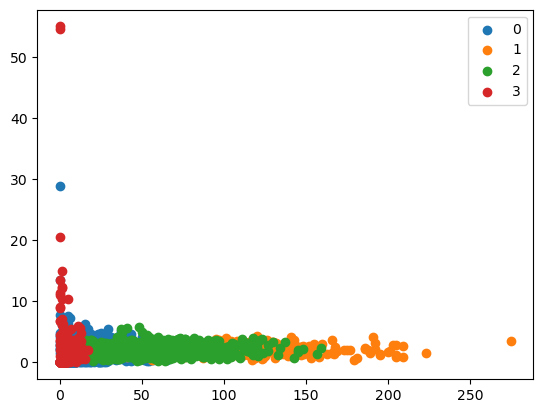

In [58]:
plt.scatter(intl_wing.loc[intl_wing["wing_cluster"] == 0, "personal_fouls_drawn"], intl_wing.loc[intl_wing["wing_cluster"] == 0, "steal_percentage"], label = 0)
plt.scatter(intl_wing.loc[intl_wing["wing_cluster"] == 1, "personal_fouls_drawn"], intl_wing.loc[intl_wing["wing_cluster"] == 1, "steal_percentage"], label = 1)
plt.scatter(intl_wing.loc[intl_wing["wing_cluster"] == 2, "personal_fouls_drawn"], intl_wing.loc[intl_wing["wing_cluster"] == 2, "steal_percentage"], label = 2)
plt.scatter(intl_wing.loc[intl_wing["wing_cluster"] == 3, "personal_fouls_drawn"], intl_wing.loc[intl_wing["wing_cluster"] == 3, "steal_percentage"], label = 3)
plt.legend()
plt.show()

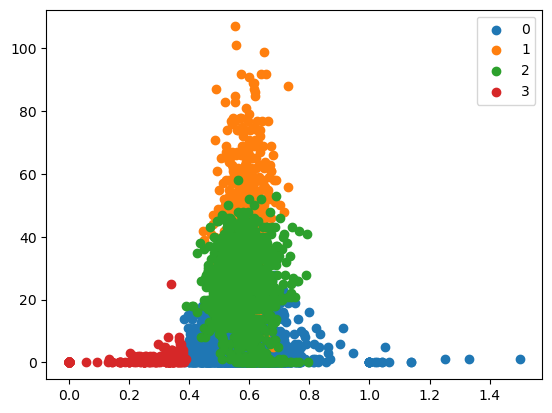

In [59]:
plt.scatter(intl_wing.loc[intl_wing["wing_cluster"] == 0, "true_shooting_percentage"], intl_wing.loc[intl_wing["wing_cluster"] == 0, "three_points_made"], label = 0)
plt.scatter(intl_wing.loc[intl_wing["wing_cluster"] == 1, "true_shooting_percentage"], intl_wing.loc[intl_wing["wing_cluster"] == 1, "three_points_made"], label = 1)
plt.scatter(intl_wing.loc[intl_wing["wing_cluster"] == 2, "true_shooting_percentage"], intl_wing.loc[intl_wing["wing_cluster"] == 2, "three_points_made"], label = 2)
plt.scatter(intl_wing.loc[intl_wing["wing_cluster"] == 3, "true_shooting_percentage"], intl_wing.loc[intl_wing["wing_cluster"] == 3, "three_points_made"], label = 3)
plt.legend()
plt.show()

In [60]:
nba_wing.sort_values(by = "deflections", ascending = False).head(20)

,deflections,personal_fouls_drawn,true_shooting_percentage,three_points_made,steal_percentage,wing_cluster
last_name,,,,,,
Yildizli,287,0,0.5391,60,2.7283,3
Yildizli,252,0,0.5312,106,2.7033,3
Luwawu-Cabarrot,242,0,0.5436,131,2.2734,3
Gerun,238,0,0.5124,79,2.4220,3
Parrillo,225,0,0.5744,197,2.2083,3
Hammons,224,0,0.5315,159,2.4004,3
Parrillo,221,0,0.5961,138,2.8461,3
Gerun,219,0,0.5610,172,2.2985,3
Parrillo,216,0,0.6229,239,1.6202,3


In [ ]:
intl_wing.sort_values(by = ["steal_percentage", "personal_fouls_drawn"], ascending = False).head(20)

In [62]:
nba_wing.sort_values(by = "three_points_made", ascending = False).head(20)

,deflections,personal_fouls_drawn,true_shooting_percentage,three_points_made,steal_percentage,wing_cluster
last_name,,,,,,
Parrillo,216,0,0.6229,239,1.6202,3
Hammons,180,0,0.6059,237,1.7990,3
Hammons,0,0,0.6014,232,2.3239,0
Jaramaz,0,0,0.5848,204,1.6136,0
Hammons,0,0,0.5854,203,2.4806,0
Radoncic Jr.,0,0,0.5926,202,1.3546,0
Sloan,83,0,0.6283,200,1.2493,3
Parrillo,225,0,0.5744,197,2.2083,3
Kaimakoglou,0,0,0.5392,194,1.9504,0


In [63]:
intl_wing.sort_values(by = "three_points_made", ascending = False).head(20)

,deflections,personal_fouls_drawn,true_shooting_percentage,three_points_made,steal_percentage,wing_cluster
last_name,,,,,,
forbes,0,205,0.5521,107,2.8240,1
thompson,0,205,0.5552,101,1.1619,1
smith-rivera,0,63,0.6501,99,1.5787,1
melo,0,87,0.5719,92,0.7264,1
ha,0,39,0.6392,92,1.0400,1
moraschini,0,68,0.6549,92,1.4490,1
alexander-walker,0,30,0.5976,91,1.3487,1
balbi,0,110,0.6168,89,2.9717,1
cerella,0,141,0.6134,89,1.1154,1


## Big Section

In [65]:
nba_big_s = scaler.fit_transform(nba_big)
intl_big_s = scaler.fit_transform(intl_big)

In [66]:
kmeans_big = KMeans(n_clusters = 4, init = "k-means++", max_iter = 500, random_state = 352)

kmeans_big.fit(nba_big_s)
nba_big_labels = kmeans_wing.predict(nba_big_s)

In [67]:
silhouette_big = silhouette_score(nba_big_s, nba_big_labels)
silhouette_big

0.44073727443613964

In [68]:
nba_big["big_cluster"] = nba_big_labels
nba_big

C:\Users\jared\AppData\Local\Temp\ipykernel_27000\4087360786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_big["big_cluster"] = nba_big_labels


,block_percentage,defensive_rebounding_percentage,two_points_made,screen_assists,second_chance_points,big_cluster
last_name,,,,,,
Christmas,0.6262,8.3138,43,14,0,1
Christmas,1.1719,10.2934,33,4,0,1
Christmas,1.2268,7.2142,15,1,0,1
Humphrey,3.8387,18.4324,41,0,0,1
Humphrey,2.8704,18.4784,62,0,0,1
...,...,...,...,...,...,...
Nwaelele,1.7990,14.0662,64,7,0,1
Nwaelele,1.9314,16.4964,44,13,0,1
Nowitzki,4.8256,21.3207,54,34,0,3


In [69]:
np.unique(nba_big_labels, return_counts = True)

(array([0, 1, 3]), array([ 131, 1407,  147], dtype=int64))

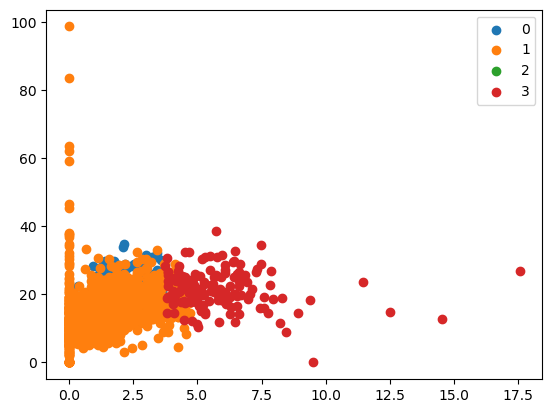

In [70]:
plt.scatter(nba_big.loc[nba_big["big_cluster"] == 0, "block_percentage"], nba_big.loc[nba_big["big_cluster"] == 0, "defensive_rebounding_percentage"], label = 0)
plt.scatter(nba_big.loc[nba_big["big_cluster"] == 1, "block_percentage"], nba_big.loc[nba_big["big_cluster"] == 1, "defensive_rebounding_percentage"], label = 1)
plt.scatter(nba_big.loc[nba_big["big_cluster"] == 2, "block_percentage"], nba_big.loc[nba_big["big_cluster"] == 2, "defensive_rebounding_percentage"], label = 2)
plt.scatter(nba_big.loc[nba_big["big_cluster"] == 3, "block_percentage"], nba_big.loc[nba_big["big_cluster"] == 3, "defensive_rebounding_percentage"], label = 3)
plt.legend()
plt.show()

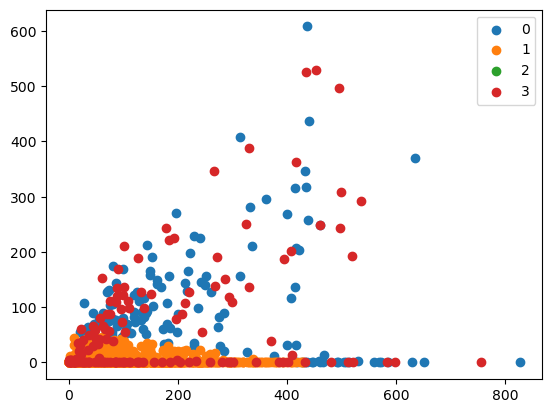

In [71]:
plt.scatter(nba_big.loc[nba_big["big_cluster"] == 0, "two_points_made"], nba_big.loc[nba_big["big_cluster"] == 0, "screen_assists"], label = 0)
plt.scatter(nba_big.loc[nba_big["big_cluster"] == 1, "two_points_made"], nba_big.loc[nba_big["big_cluster"] == 1, "screen_assists"], label = 1)
plt.scatter(nba_big.loc[nba_big["big_cluster"] == 2, "two_points_made"], nba_big.loc[nba_big["big_cluster"] == 2, "screen_assists"], label = 2)
plt.scatter(nba_big.loc[nba_big["big_cluster"] == 3, "two_points_made"], nba_big.loc[nba_big["big_cluster"] == 3, "screen_assists"], label = 3)
plt.legend()
plt.show()

In [72]:
kmeans_big2 = KMeans(n_clusters = 4, init = "k-means++", max_iter = 500, random_state = 352)

kmeans_big2.fit(intl_big_s)
intl_big_labels = kmeans_wing.predict(intl_big_s)

In [73]:
silhouette_big2 = silhouette_score(intl_big_s, intl_big_labels)
silhouette_big2

0.41033574324510375

In [74]:
intl_big["big_cluster"] = intl_big_labels
intl_big

C:\Users\jared\AppData\Local\Temp\ipykernel_27000\3188871416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intl_big["big_cluster"] = intl_big_labels


,block_percentage,defensive_rebounding_percentage,two_points_made,screen_assists,second_chance_points,big_cluster
last_name,,,,,,
greene,0.0000,13.4519,40,0,0,1
greene,0.8292,13.5418,26,0,0,1
brussino,3.0675,14.5608,14,0,0,1
brussino,1.4668,14.6187,24,0,0,1
christmas,2.4437,6.9312,3,0,0,1
...,...,...,...,...,...,...
nowitzki,4.6382,22.3172,85,0,0,3
oakley,0.0000,12.7263,3,0,0,1
toolson,0.6259,15.3084,32,0,0,1


In [75]:
np.unique(intl_big_labels, return_counts = True)

(array([0, 1, 3]), array([ 196, 2893,  281], dtype=int64))

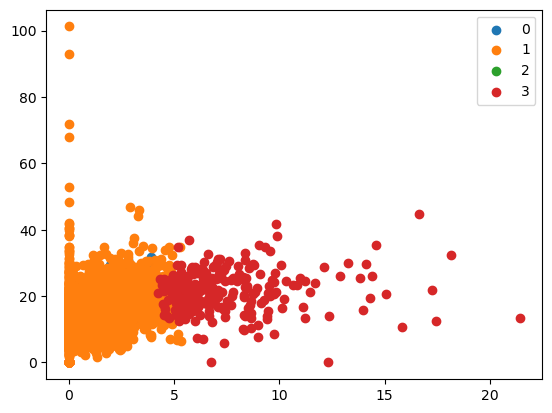

In [76]:
plt.scatter(intl_big.loc[intl_big["big_cluster"] == 0, "block_percentage"], intl_big.loc[intl_big["big_cluster"] == 0, "defensive_rebounding_percentage"], label = 0)
plt.scatter(intl_big.loc[intl_big["big_cluster"] == 1, "block_percentage"], intl_big.loc[intl_big["big_cluster"] == 1, "defensive_rebounding_percentage"], label = 1)
plt.scatter(intl_big.loc[intl_big["big_cluster"] == 2, "block_percentage"], intl_big.loc[intl_big["big_cluster"] == 2, "defensive_rebounding_percentage"], label = 2)
plt.scatter(intl_big.loc[intl_big["big_cluster"] == 3, "block_percentage"], intl_big.loc[intl_big["big_cluster"] == 3, "defensive_rebounding_percentage"], label = 3)
plt.legend()
plt.show()

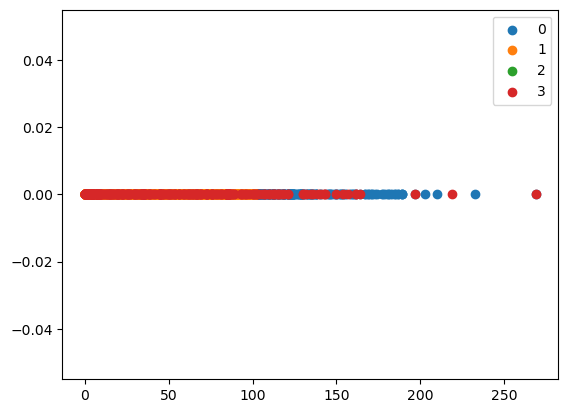

In [77]:
plt.scatter(intl_big.loc[intl_big["big_cluster"] == 0, "two_points_made"], intl_big.loc[intl_big["big_cluster"] == 0, "screen_assists"], label = 0)
plt.scatter(intl_big.loc[intl_big["big_cluster"] == 1, "two_points_made"], intl_big.loc[intl_big["big_cluster"] == 1, "screen_assists"], label = 1)
plt.scatter(intl_big.loc[intl_big["big_cluster"] == 2, "two_points_made"], intl_big.loc[intl_big["big_cluster"] == 2, "screen_assists"], label = 2)
plt.scatter(intl_big.loc[intl_big["big_cluster"] == 3, "two_points_made"], intl_big.loc[intl_big["big_cluster"] == 3, "screen_assists"], label = 3)
plt.legend()
plt.show()

In [78]:
nba_big.sort_values(by = "block_percentage", ascending = False).head(20)

,block_percentage,defensive_rebounding_percentage,two_points_made,screen_assists,second_chance_points,big_cluster
last_name,,,,,,
Ladurner,17.5536,27.0218,4,3,0,3
Bass,14.5266,12.8071,10,1,0,3
Rudez,12.5030,14.7043,3,0,0,3
Ollie,11.4546,23.6955,25,40,0,3
Luz,9.5141,0.0000,2,0,0,3
Burns,9.3989,18.3769,344,0,0,3
Ventura,8.9106,14.6063,22,15,0,3
Cleaves,8.4577,8.8241,1,4,0,3
Camby III,8.2836,19.0498,27,0,0,3


In [79]:
intl_big.sort_values(by = "block_percentage", ascending = False).head(20)

,block_percentage,defensive_rebounding_percentage,two_points_made,screen_assists,second_chance_points,big_cluster
last_name,,,,,,
covington,21.4147,13.4190,0,0,0,3
oden,18.1247,32.3106,2,0,0,3
sweetney,17.4376,12.5564,6,0,0,3
mbenga,17.2477,21.7709,1,0,0,3
catanella,16.6170,44.8504,0,0,0,3
morse,15.8424,10.5761,0,0,0,3
kalaitzakis,15.0376,20.7185,5,0,0,3
miller,14.5844,35.3647,3,0,0,3
ollie,14.4107,25.9734,84,0,0,3


In [80]:
nba_big.sort_values(by = "two_points_made", ascending = False).head(20)

,block_percentage,defensive_rebounding_percentage,two_points_made,screen_assists,second_chance_points,big_cluster
last_name,,,,,,
Lammers,2.0426,17.9769,827,0,0,0
Lammers,3.8101,18.9857,755,0,0,3
Ashley,0.2706,8.5649,651,0,0,0
Herrmann,3.2594,30.7003,635,370,0,0
Herrmann,2.0172,25.0497,629,0,10,0
Jimenez,3.8701,22.5628,598,0,6,3
Ashley,0.0389,6.2098,586,0,0,0
Burns,6.0951,20.8195,583,0,0,3
Ashley,0.3131,10.6049,572,0,0,0


In [81]:
intl_big.sort_values(by = "two_points_made", ascending = False).head(20)

,block_percentage,defensive_rebounding_percentage,two_points_made,screen_assists,second_chance_points,big_cluster
last_name,,,,,,
sweetney,6.4496,23.6912,269,0,0,3
graham,3.1616,22.1373,269,0,0,0
koenig,1.2730,22.3721,233,0,0,0
leaf,5.4979,19.7680,219,0,0,3
baba,1.0952,15.1201,210,0,0,0
joe,3.7089,23.3962,203,0,0,0
adel,4.2180,21.0700,197,0,0,3
drummond,3.3021,20.7551,197,0,0,0
brooks,0.1696,10.0911,189,0,0,0
